### TP : Traitement du signal 2
### Objectif

L'objectif de ce TP est de mettre en oeuvre une communication numérique entre deux ordinateur via une liaison Jack. 

### Matériel

- 2 Ordinateurs sous Ubuntu avec Python et Jupyter
- 1 Canal composé d’une boîte noire et de deux câbles jack

### Questions

1. Mettre en oeuvre une chaîne de communication numérique.
2. Quelle modulation sera utilisée lors de ce TP ? Pourquoi ? 
3. Essayer de transmettre des messages avec différentes forme d’onde. 
4. Quelle est la forme d’onde la plus robuste aux bruits ?
5. Quelle est l’interêt du code ASCII ? 
6. Existe-t-il un code source plus avantageux que le ASCII ?

## Code

Voici le code Python à utiliser pour enregistrer une communication numérique :

```
# Importer les bibliothèques nécessaires
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import comnumfip2


signal = comnumfip2.receive_signal() #Acquisition du signal 

signal_binaire = commnumfip2.sample_and_threshold(signal)

#La ligne ci-dessus permet d'échantillonner et de seuiller le signal acquérit.
```


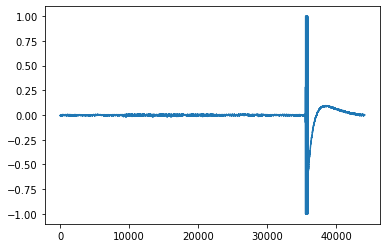

[1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
ßÆðcÁñü`     


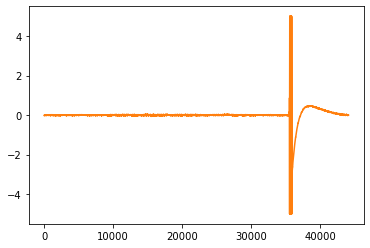

In [31]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

reload(comnumfip2)

fs=44100
duration=1
analog_test =[]
while len(analog_test)==0:
    analog = sd.rec(int(duration*fs),samplerate=fs,channels=1)
    sd.wait()
    #Filtre de réception
    mask = (analog<-0.5) | (analog>0.5) #On garde tout ce qui a une amplitude de plus de 0.9V
    analog_test = analog[mask]



plt.plot(analog)
plt.show()

fe=44100
t= np.arange(0,1/10000,1/fe)
motif = np.where((t<=(1/10000)),1,0)

plt.plot(motif)
nb=0
x_last=0
for x in analog_test:
    if x_last == x :
        nb+=1
    else:
        if nb < 10:
            for y in range(nb):
                analog_test[y]=100
            nb=0
        if nb >= 10:
            nb=0
            pass
    x_last=x


np.delete(analog_test,np.where(analog_test==100))

analog=analog.flatten()

filtered_signal = np.correlate(analog, motif, mode='same')


plt.plot(filtered_signal)

bin=comnumfip2.sample_and_threshold(analog_test,0.9)
print(bin)
print(comnumfip2.bin2ascii(bin))


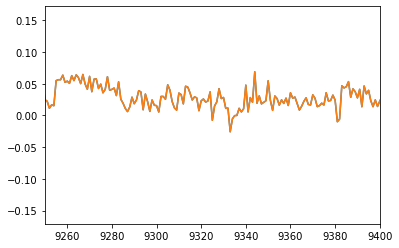

[0 0 0 ... 0 0 0]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

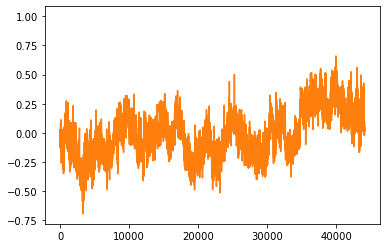

In [17]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

reload(comnumfip2)


plt.plot(analog)
plt.xlim(9200,9500)
#plt.plot(filtered_signal)
plt.xlim(9250,9400)

plt.plot(analog)
plt.show()

fe=44100
t= np.arange(0,1/10000,1/fe)
motif = np.where((t<=(1/10000)),1,0)

plt.plot(motif)

analog=analog.flatten()

filtered_signal = np.correlate(analog, motif, mode='same')


plt.plot(filtered_signal)

bin=comnumfip2.sample_and_threshold(filtered_signal,0.9)
print(bin)
print(comnumfip2.bin2ascii(bin))